In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn import metrics

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import time

In [2]:
def plot_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()
    plt.clf()

In [3]:
def plot_log_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.semilogx(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.semilogx(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()
    plt.clf()

In [4]:
def import_data():
    df_ds1 = pd.read_csv("winequality-red.csv", sep=";") # .append(pd.read_csv("winequality-white.csv", sep=";"))
    missing_values = ['?']
    df_ds2 = pd.read_csv("breast-cancer-wisconsin.csv", sep=",",na_values = missing_values)
    df_ds2.fillna(method='ffill',inplace=True)
    X_ds1 = np.array(df_ds1.values[:,1:-1])
    y_ds1 = np.array(df_ds1.values[:,-1])
    y_ds1 = (y_ds1<7).astype(int)
    X_ds2 = np.array(df_ds2.values[:,1:-1])
    y_ds2 = np.array(df_ds2.values[:,-1])
    return X_ds1, y_ds1, X_ds2, y_ds2

In [5]:
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.25)
    sc = preprocessing.StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

In [6]:
def nn_learner(X_train, X_test, y_train, y_test):
    #clf_nn = MLPClassifier(hidden_layer_sizes=(10, 10,10), random_state=18, max_iter=1000)
    __clf_nn = MLPClassifier(hidden_layer_sizes=(20, 20,10),random_state=18)
    print(__clf_nn)
    __clf_nn.fit(X_train, y_train)
    y_pred = __clf_nn.predict(X_test)
    nn_accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))
    return __clf_nn

In [7]:
def plot_nn_validation_curve(clf_nn,X_train, y_train,filename_alpha,filename_lr):
    # Alpha
    alpha_range =  np.logspace(-3, 2, 6)
    train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="alpha", param_range=alpha_range, cv=5)
    plot_log_learner(alpha_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation Curve for  Neural Network', 'Alpha',  'Score', filename_alpha)
    # Learning rate
    lr_range = np.logspace(-5, 0, 6)
    train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="learning_rate_init", param_range=lr_range,cv=5)
    plot_log_learner(lr_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation Curve for  Neural Network', 'Learning Rate',  'Score', filename_lr)



In [8]:
def set_nn_hyperparameters(clf_nn, X_train, y_train,X_test):
    _params = [{'hidden_layer_sizes' : [(10, 10,10),(10, 5,10),(20, 20,20)], 'alpha' : np.logspace(-2, 2, 5), 'learning_rate_init' : np.logspace(-3, 1, 5)}]
    clf_nn = GridSearchCV(clf_nn, param_grid=_params, cv=5)
    clf_nn.fit(X_train, y_train)
    clf_nn_ = clf_nn
    best_params = clf_nn.best_params_
    print('Best Parameters: ',clf_nn.best_params_)
    y_pred = clf_nn.predict(X_test)
    print('Accuracy of decision tree is %.2f%%' % (metrics.accuracy_score(y_test, y_pred) * 100))
    return clf_nn.best_params_

In [9]:
def plot_nn_learning_curve(clf_nn_best_params_, X_train, y_train,filename):
    __alpha = 0.1 #clf_nn_best_params_['alpha']
    __hidden_layer_sizes = (20,20,20) #clf_nn_best_params_['hidden_layer_sizes']
    __learning_rate_init = 0.1 #clf_nn_best_params_['learning_rate_init']
    __clf_lc_nn = MLPClassifier(random_state=18,alpha=__alpha,hidden_layer_sizes=__hidden_layer_sizes,learning_rate_init=__learning_rate_init)
    print(__clf_lc_nn)
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_nn, X_train, y_train, train_sizes=train_sizes, cv=5,random_state=18)
    
    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning Curve for  Neural Network', 'Training Examples',  'Score', filename)


In [10]:
X_ds1, y_ds1, X_ds2, y_ds2 = import_data()

In [11]:
X_train, X_test, y_train, y_test = train_test(X_ds1, y_ds1)

In [12]:
clf_nn1 = nn_learner(X_train, X_test, y_train, y_test)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=18, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy of neural network without hyperparameter tuning is 89.75%


C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib

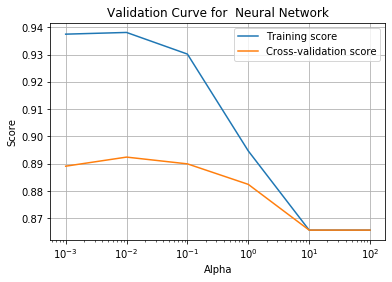

C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib

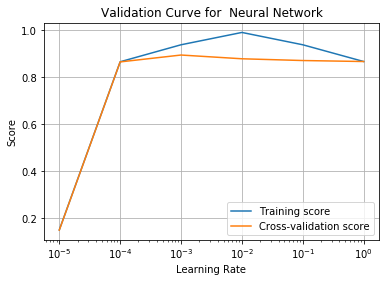

<Figure size 432x288 with 0 Axes>

In [13]:
plot_nn_validation_curve(clf_nn1, X_train, y_train,'nn_validation_curve_alpha_1-100.png','nn_validation_curve_lr_1-100.png')

In [14]:
params_best_1 = set_nn_hyperparameters(clf_nn1, X_train, y_train,X_test)

C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib

Best Parameters:  {'alpha': 1.0, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.01}
Accuracy of decision tree is 88.75%


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.1, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=18, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


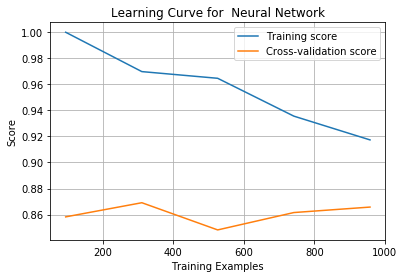

<Figure size 432x288 with 0 Axes>

In [15]:
plot_nn_learning_curve(params_best_1, X_train, y_train,'nn_learning_curve_1-100.png')

In [16]:
X_train, X_test, y_train, y_test = train_test(X_ds2, y_ds2)

In [17]:
clf_nn2 = nn_learner(X_train, X_test, y_train, y_test)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=18, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy of neural network without hyperparameter tuning is 96.57%


C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib

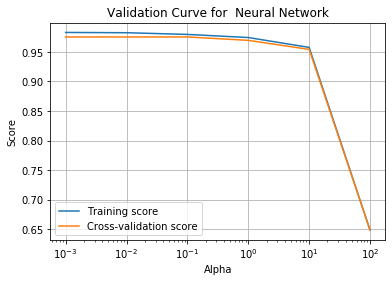

C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib

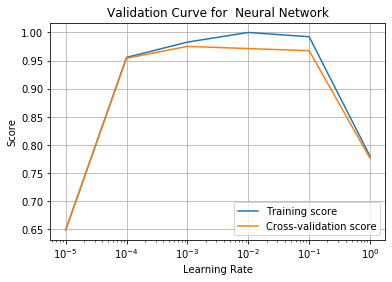

<Figure size 432x288 with 0 Axes>

In [18]:
plot_nn_validation_curve(clf_nn2, X_train, y_train,'nn_validation_curve_alpha_2-100.png','nn_validation_curve_lr_2-100.png')

In [19]:
params_best_2 = set_nn_hyperparameters(clf_nn1, X_train, y_train,X_test)

C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Dev\Anaconda3\lib

Best Parameters:  {'alpha': 0.01, 'hidden_layer_sizes': (10, 5, 10), 'learning_rate_init': 0.001}
Accuracy of decision tree is 96.00%


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.1, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=18, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


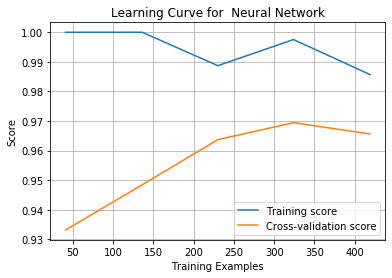

<Figure size 432x288 with 0 Axes>

In [20]:
plot_nn_learning_curve(params_best_2, X_train, y_train,'nn_learning_curve_2-100.png')

In [21]:
np.logspace(-3, 1,5)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])